<a href="https://colab.research.google.com/github/anirudhawagh/HEALTH-INSURANCE-CROSS-SELL-PREDICTION-by-Aniruddha-wagh/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION_by_Aniruddha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -HEALTH INSURANCE CROSS SELL PREDICTION



##### **Project Type**    -Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Aniruddha Narayan Wagh


# **Project Summary -**

In this project, our goal was to assist an insurance company in predicting whether their past policyholders would be interested in purchasing vehicle insurance. By understanding customer behavior, the company could refine their strategies and optimize revenue generation. The dataset included 381,109 rows and 12 features, with the categorical variable "Response" indicating customer interest in vehicle insurance.

We began by checking for null and duplicate values, finding none and thus avoiding the need for data cleaning. Next, we normalized the numerical columns to ensure consistency.

In the exploratory data analysis, we categorized age into three groups (YoungAge, MiddleAge, and OldAge) to gain insights into age-related preferences. We also categorized Region_Code and Policy_Sales_Channel to extract valuable information. Through plots, we explored independent features and their relationship with the target variable.

For feature selection, we employed Kendall's rank correlation coefficient for numerical features and the Mutual Information technique for categorical features. These methods helped identify the most relevant features associated with the target variable.

To predict customer interest, we implemented various supervised machine learning algorithms, including Decision Tree Classifier, AdaBoost, LightGBM, BaggingRegressor, NaiveBayes, and Logistic Regression. Hyperparameter tuning was applied to optimize model performance and prevent overfitting.

  

# **GitHub Link -**

 GitHub Link -https://github.com/anirudhawagh/HEALTH-INSURANCE-CROSS-SELL-PREDICTION-by-Aniruddha-wagh

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
#@title

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


dataset link = https://drive.google.com/file/d/1AW5Gz6IqktDOoIjaBeWvy-HMaF5Y84sX/view

### Dataset Loading

In [3]:
# Load Dataset
database ="/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"
data_df =pd.read_csv(database)

### Dataset First View

In [4]:
# Dataset First Look
data_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Index:", data_df.index)
print('\n')
print("Columns:", data_df.columns)
print('\n')
print("Number of rows:", len(data_df))

Index: RangeIndex(start=0, stop=381109, step=1)


Columns: Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


Number of rows: 381109


### Dataset Information

In [6]:
# Dataset Info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

duplicate_count = data_df.duplicated().sum()

print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
# Visualizing the missing values
miss_values =data_df.isnull().sum().sort_values(ascending=False)
miss_values # We have check the count of null value in individual columns

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

Dataset Size: The dataset consists of 381,109 rows and 12 columns.Column Information: The dataset contains columns with the following names: 'id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', and 'Response'. Each column represents a different feature or attribute of the data.Data Characteristics: The dataset contains various types of information such as demographic details (gender, age), driving-related information (driving license, region code), insurance-related details (previously insured, vehicle age, vehicle damage), policy information (annual premium, policy sales channel), and historical information (vintage). The 'Response' column likely indicates the target variable or the outcome of interest.Data Quality: The dataset does not have any duplicate values or missing/null values, as indicated by the counts of duplicates and missing values being zero.

## ***2. Understanding Your Variables***






In [10]:
# Dataset Columns
columns = data_df.columns.tolist()

print("Dataset Columns:")
for column in columns:
    print(column)

Dataset Columns:
id
Gender
Age
Driving_License
Region_Code
Previously_Insured
Vehicle_Age
Vehicle_Damage
Annual_Premium
Policy_Sales_Channel
Vintage
Response


In [11]:
# Dataset Describe
data_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

Health Insurance Dataset
Columns:
ID: Unique identifier for the Customer.

Age: Age of the Customer.

Gender: Gender of the Customer.

Driving_License: 0 for customer not having DL, 1 for customer having DL.

Region_Code: Unique code for the region of the customer.

Previously_Insured: 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

Vehicle_Age: Age of the vehicle.

Vehicle_Damage: Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium: The amount customer needs to pay as premium in the year.

Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage: Number of Days, Customer has been associated with the company.

Response (Dependent Feature): 1 for Customer is interested, 0 for Customer is not interested.

### Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [13]:
# Create a new column 'Renewed_Insurance' to indicate whether a customer renewed insurance or not
data_df['Renewed_Insurance'] = data_df['Response'].map({1: 'Yes', 0: 'No'})

# Create custom age bins
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = [f'{age}-{age+4}' for age in age_bins[:-1]]
data_df['Age_Group'] = pd.cut(data_df['Age'], bins=age_bins, right=False, labels=age_labels)



# Display the updated DataFrame with the new columns
print(data_df)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [14]:
print(data_df['Age_Group'].unique())
print(data_df['Renewed_Insurance'].unique())

['40-44', '75-79', '45-49', '20-24', '25-29', ..., '60-64', '65-69', '50-54', '80-84', '85-89']
Length: 14
Categories (16, object): ['20-24' < '25-29' < '30-34' < '35-39' ... '80-84' < '85-89' < '90-94' < '95-99']
['Yes' 'No']


In [15]:
import pandas as pd

# Assume your DataFrame is named data_df

# Define the age categories
def categorize_age(age):
    if age < 35:
        return 'Young'
    elif age >= 35 and age <= 64:
        return 'Middle Age'
    else:
        return 'Senior'

# Create the new column 'Age_Category'
data_df['Age_Category'] = data_df['Age'].apply(categorize_age)

# Display the updated DataFrame
print(data_df)


            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [16]:
import pandas as pd

# List of region codes
region_codes = [28, 3, 11, 41, 33, 6, 35, 50, 15, 45, 8, 36, 30, 26, 16, 47, 48, 19, 39, 23, 37, 5, 17, 2, 7, 29, 46, 27, 25, 13, 18, 20, 49, 22, 44, 0, 9, 31, 12, 34, 21, 10, 14, 38, 24, 40, 43, 32, 4, 51, 42, 1, 52]

# Divide the region codes into 4 sets
num_sets = 4
sets_of_region_codes = [region_codes[i:i+13] for i in range(0, len(region_codes), 13)]

# Create a mapping of region codes to region names
region_mapping = {
    'North': sets_of_region_codes[0],
    'South': sets_of_region_codes[1],
    'East': sets_of_region_codes[2],
    'West': sets_of_region_codes[3]
}

# Create a new column 'Region' in the dataset based on the region codes
data_df['Region'] = data_df['Region_Code'].apply(lambda x: next((region_name for region_name, region_codes in region_mapping.items() if x in region_codes), 'Unknown'))

# Display the updated DataFrame with the new 'Region' column
print(data_df)


            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [17]:
# Dataset Columns
columns = data_df.columns.tolist()

print("Dataset Columns:")
for column in columns:
    print(column)

Dataset Columns:
id
Gender
Age
Driving_License
Region_Code
Previously_Insured
Vehicle_Age
Vehicle_Damage
Annual_Premium
Policy_Sales_Channel
Vintage
Response
Renewed_Insurance
Age_Group
Age_Category
Region


In [18]:
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Renewed_Insurance,Age_Group,Age_Category,Region
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Yes,40-44,Middle Age,North
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,No,75-79,Senior,North
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Yes,45-49,Middle Age,North
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,No,20-24,Young,North
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,No,25-29,Young,North


### What all manipulations have you done and insights you found?

  Answer Here

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

italicized text#### Chart - 1

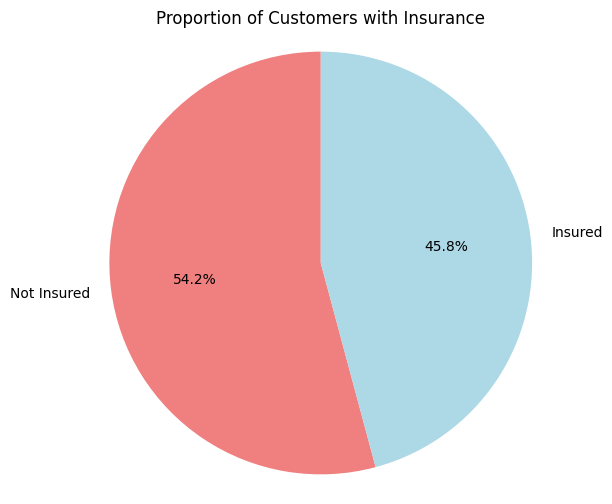

In [19]:
# Chart - 1 visualization code
# Calculate the counts of customers with and without insurance
insurance_counts = data_df['Previously_Insured'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(insurance_counts, labels=['Not Insured', 'Insured'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Proportion of Customers with Insurance')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

##### 1. Why did you pick the specific chart?

  Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

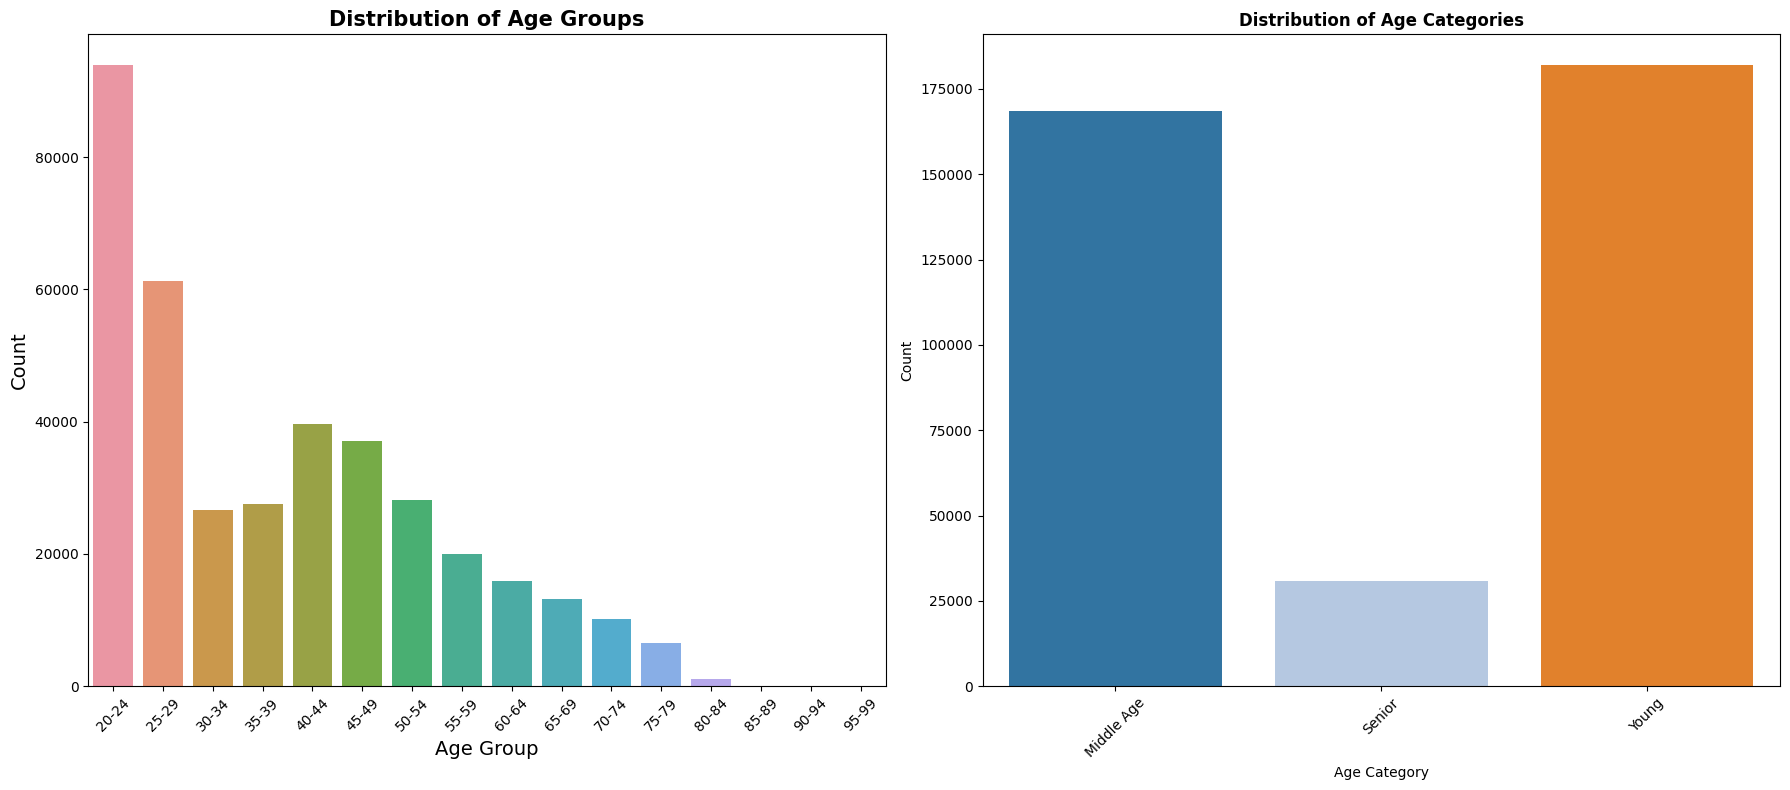

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the data into data_df

# Create custom age bins
age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

age_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
age_labels = [f'{age}-{age+4}' for age in age_bins[:-1]]
data_df['Age_Group'] = pd.cut(data_df['Age'], bins=age_bins, right=False, labels=age_labels)

# Create a figure with two subplots
plt.figure(figsize=(18, 8))

# Subplot 1: Distribution of Age Groups
plt.subplot(1, 2, 1)
sns.countplot(x='Age_Group', data=data_df)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Age Groups', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)

# Subplot 2: Distribution of Age Categories
plt.subplot(1, 2, 2)
sns.countplot(x='Age_Category', data=data_df, palette='tab20')
plt.xlabel('Age Category', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Distribution of Age Categories', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Figure size 1800x800 with 0 Axes>

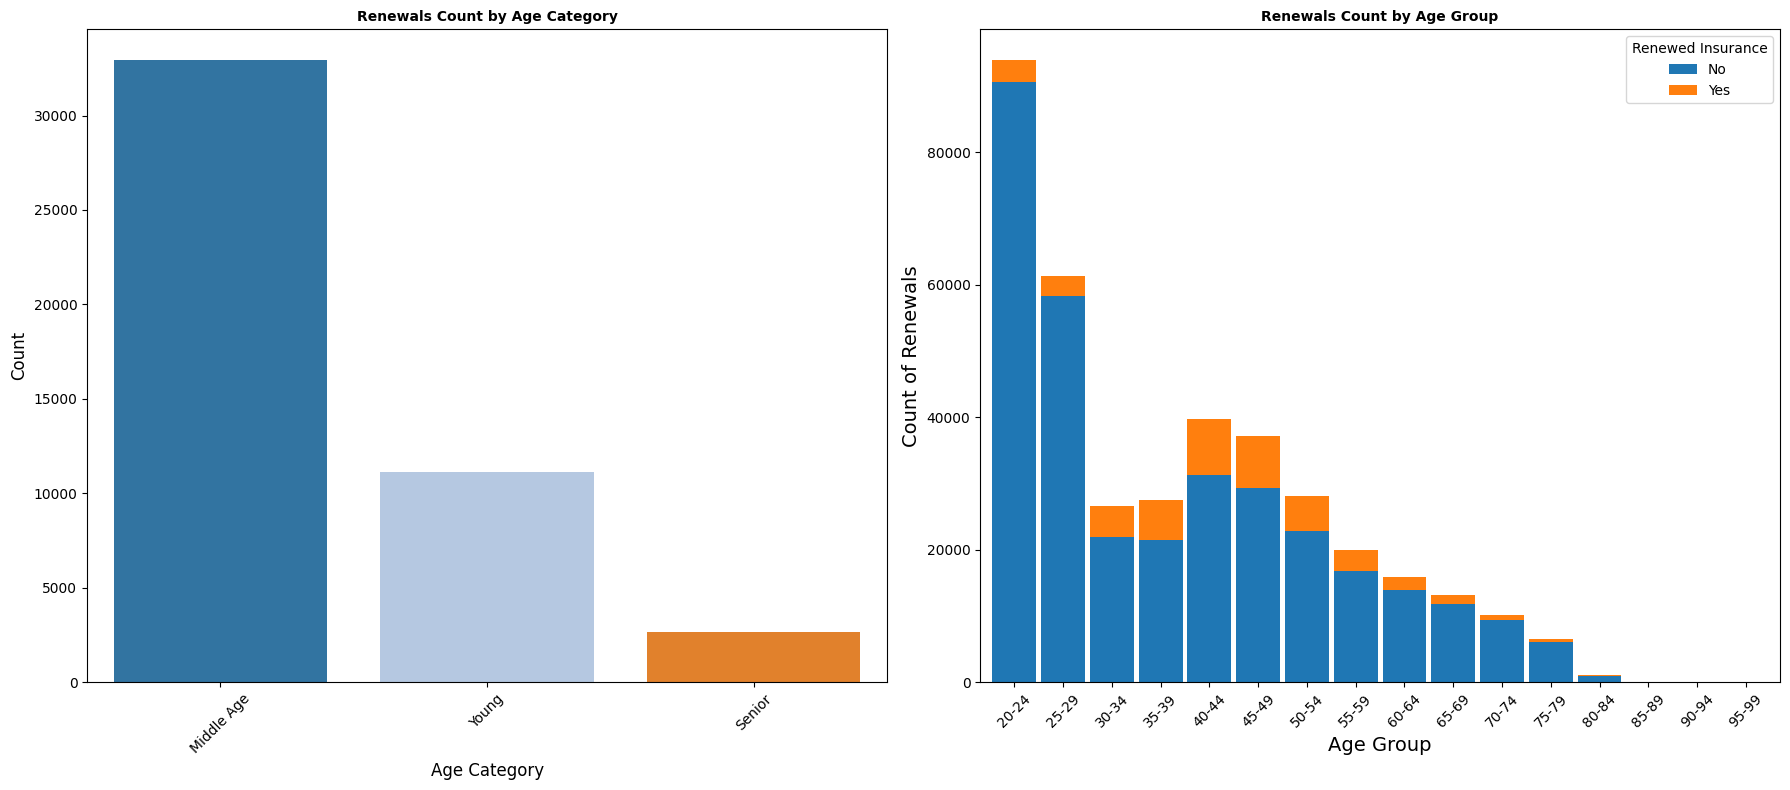

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 8))  # Adjust the figure size as needed

# Create a figure with a single row and two columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Set the same figure size for both subplots

# Filter data for renewals (Response: 'Yes')
renewals_data = data_df[data_df['Response'] == 1]

# Subplot 1: Count of Renewals by Age Category
sns.countplot(x='Age_Category', data=renewals_data, palette='tab20', ax=axes[0])
axes[0].set_xlabel('Age Category', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Renewals Count by Age Category', fontsize=10, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Subplot 2: Count of Renewals by Age Group
filtered_data_df = data_df[data_df['Age_Group'] != 'Unknown']
filtered_data_df['Renewed_Insurance'] = filtered_data_df['Renewed_Insurance'].astype('category').cat.set_categories(['Yes', 'No'])
age_group_renewals = filtered_data_df.groupby('Age_Group')['Renewed_Insurance'].value_counts().unstack(fill_value=0)
age_group_renewals[['No', 'Yes']].plot(kind='bar', stacked=True, ax=axes[1], width=0.9)  # Adjust width of bars
axes[1].set_xlabel('Age Group', fontsize=14)
axes[1].set_ylabel('Count of Renewals', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Renewed Insurance', loc='upper right', labels=['No', 'Yes'])

# Set the titles separately and adjust the layout
axes[1].set_title('Renewals Count by Age Group', fontsize=10, fontweight='bold')

# Adjust the layout of the figure to ensure everything fits properly
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

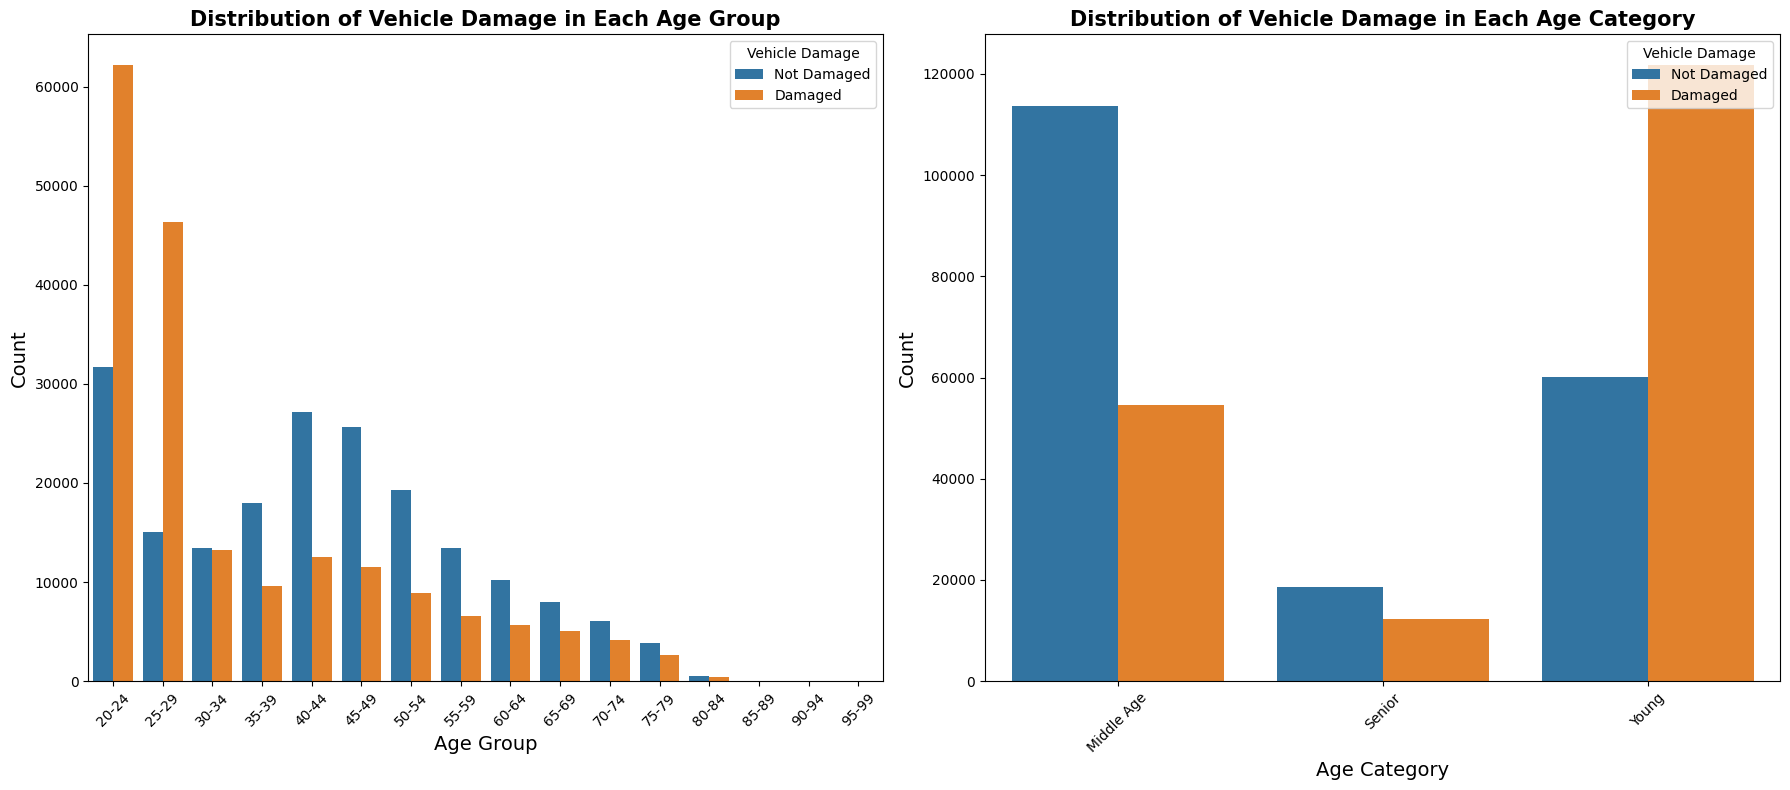

In [22]:
  # Chart - 4 visualization code
  # Plot the data
  plt.figure(figsize=(18, 8))  # Adjust the figure size as needed

  # Subplot 1: Distribution of Vehicle Damage in Each Age Group
  plt.subplot(1, 2, 1)
  sns.countplot(x='Age_Group', hue='Vehicle_Damage', data=data_df)
  plt.xlabel('Age Group', fontsize=14)
  plt.ylabel('Count', fontsize=14)
  plt.title('Distribution of Vehicle Damage in Each Age Group', fontsize=15, fontweight='bold')
  plt.xticks(rotation=45)
  plt.legend(title='Vehicle Damage', labels=['Not Damaged', 'Damaged'], loc='upper right')

  # Subplot 2: Distribution of Vehicle Damage in Each Age Category
  plt.subplot(1, 2, 2)
  sns.countplot(x='Age_Category', hue='Vehicle_Damage', data=data_df)
  plt.xlabel('Age Category', fontsize=14)
  plt.ylabel('Count', fontsize=14)
  plt.title('Distribution of Vehicle Damage in Each Age Category', fontsize=15, fontweight='bold')
  plt.xticks(rotation=45)
  plt.legend(title='Vehicle Damage', labels=['Not Damaged', 'Damaged'], loc='upper right')

  # Adjust the layout of the subplots
  plt.tight_layout()

  plt.show()


##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

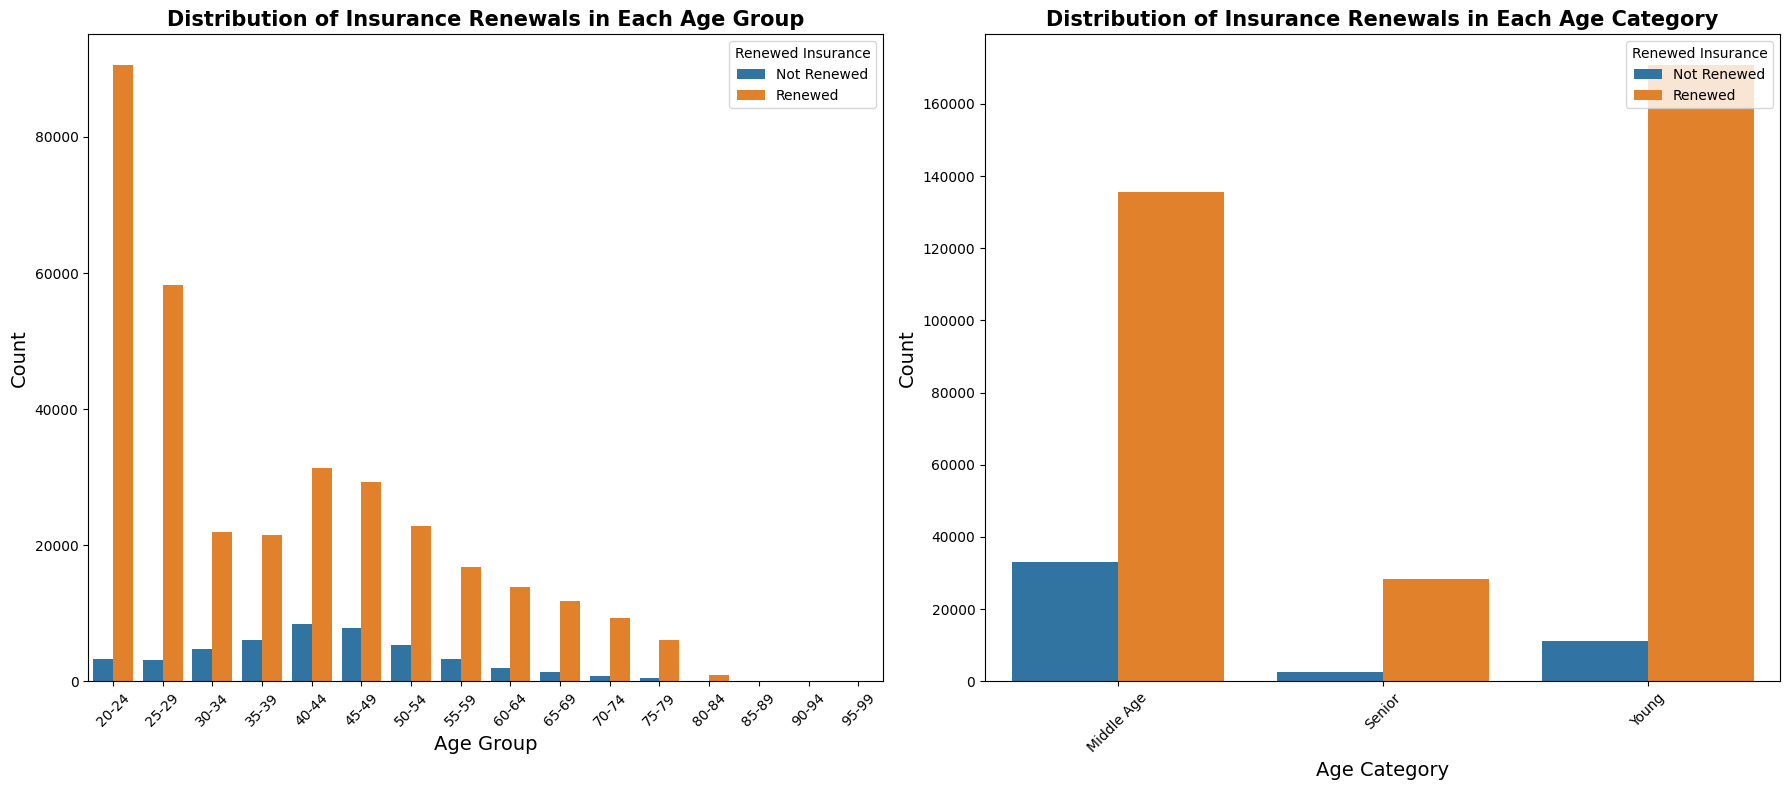

In [23]:
# Chart - 5 visualization code
# Plot the data
plt.figure(figsize=(18, 8))  # Adjust the figure size as needed

# Subplot 1: Distribution of Insurance Renewals in Each Age Group
plt.subplot(1, 2, 1)
sns.countplot(x='Age_Group', hue='Renewed_Insurance', data=data_df)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Insurance Renewals in Each Age Group', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Renewed Insurance', labels=['Not Renewed', 'Renewed'], loc='upper right')

# Subplot 2: Distribution of Insurance Renewals in Each Age Category
plt.subplot(1, 2, 2)
sns.countplot(x='Age_Category', hue='Renewed_Insurance', data=data_df)
plt.xlabel('Age Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Insurance Renewals in Each Age Category', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Renewed Insurance', labels=['Not Renewed', 'Renewed'], loc='upper right')

# Adjust the layout of the subplots
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

  Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

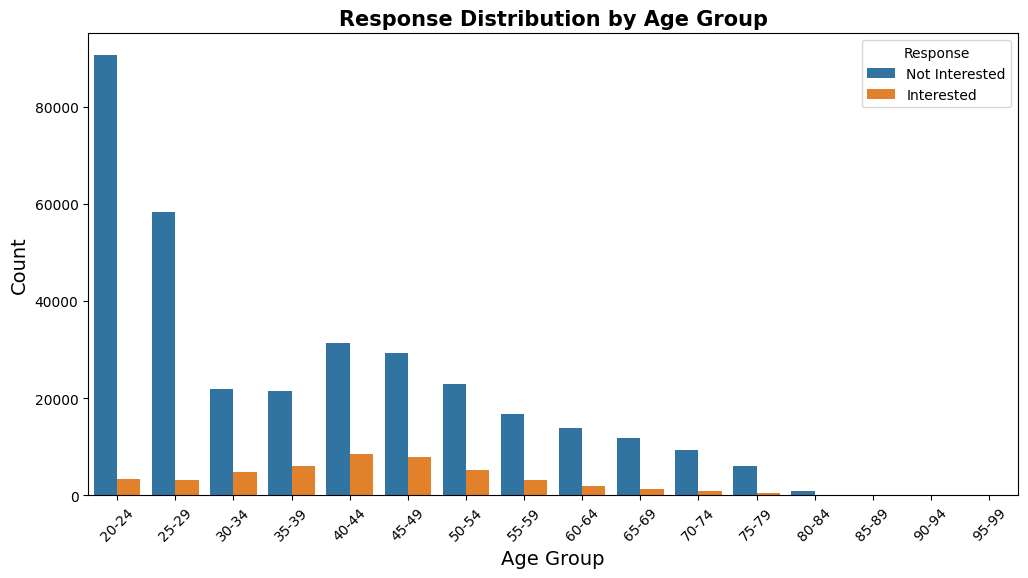

In [24]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Response', data=data_df)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Response Distribution by Age Group', fontsize=15, fontweight='bold')
plt.legend(title='Response', labels=['Not Interested', 'Interested'], loc='upper right')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

  Answer Here

  ##### 3. Will the gained insights help creating a positive business impact?
  Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

#### Chart - 7  

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

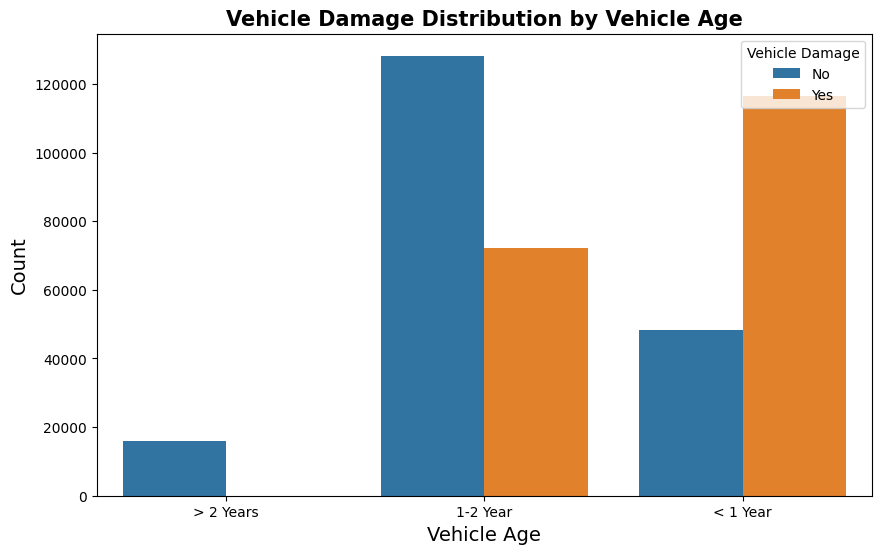

In [25]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Age', hue='Vehicle_Damage', data=data_df)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Vehicle Damage Distribution by Vehicle Age', fontsize=15, fontweight='bold')
plt.legend(title='Vehicle Damage', labels=['No', 'Yes'], loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

  ##### 3. Will the gained insights help creating a positive business impact?
  Are there any insights that lead to negative growth? Justify with specific reason

Answer Here

#### Chart - 9

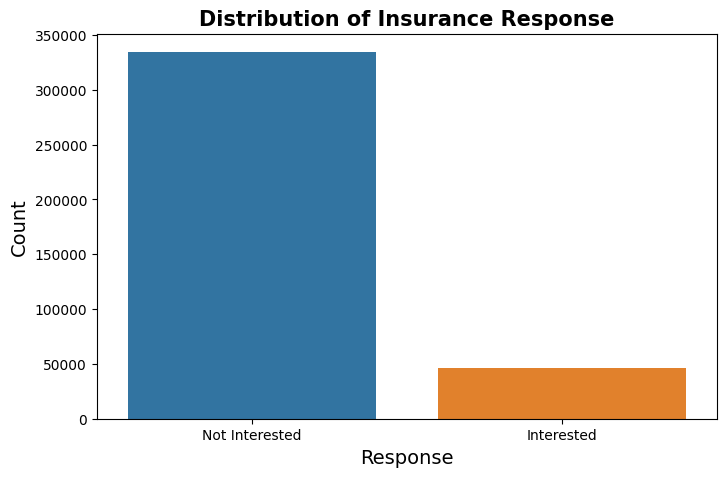

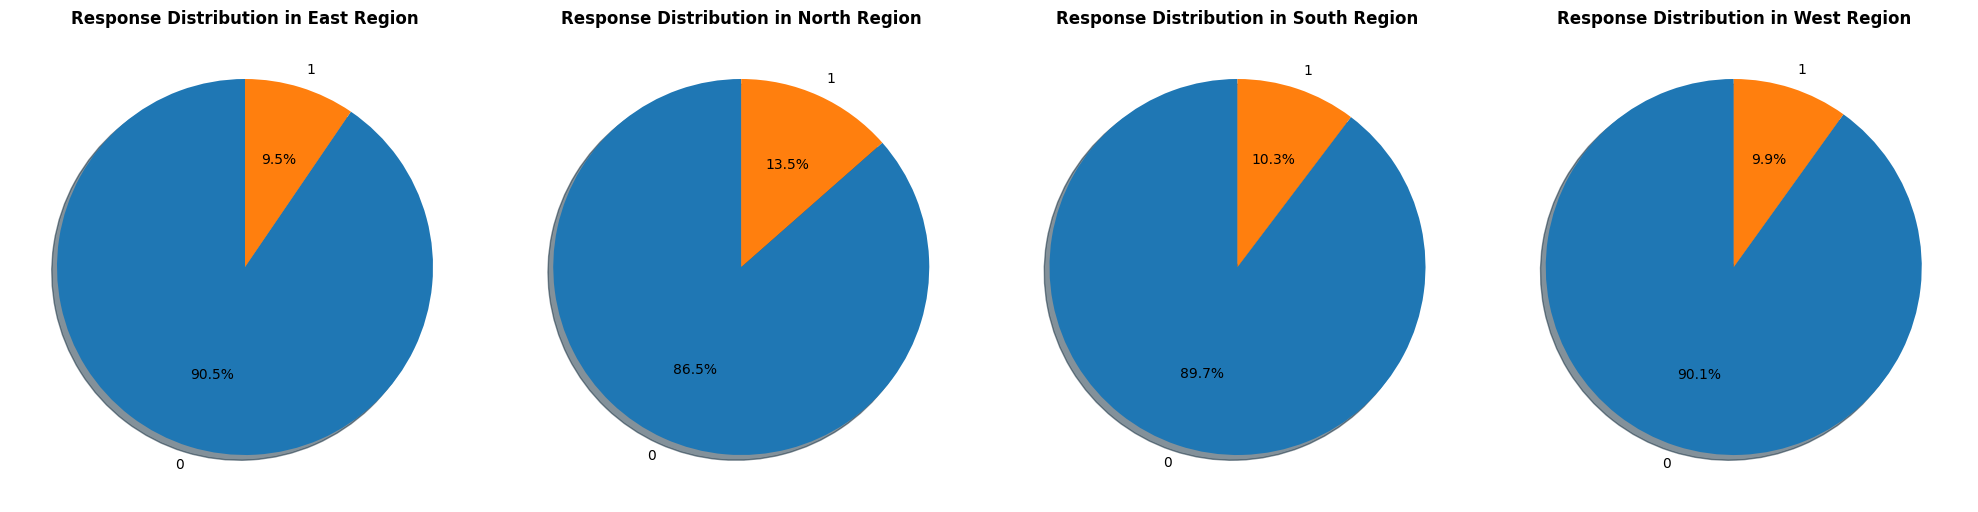

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 9 - Distribution of Insurance Response
plt.figure(figsize=(8, 5))
sns.countplot(x='Response', data=data_df)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Insurance Response', fontsize=15, fontweight='bold')
plt.xticks(ticks=[0, 1], labels=['Not Interested', 'Interested'])
plt.show()

# Filter out rows with unknown region values
filtered_data = data_df[data_df['Region'] != 'Unknown']

# Function to create a pie chart for response distribution in each region
def plot_region_response_pie(region_response_counts):
    # Create a figure and axes
    fig, axes = plt.subplots(1, len(region_response_counts), figsize=(20, 5))

    # Iterate through each region and plot the pie chart
    for i, (region, response_counts) in enumerate(region_response_counts.iterrows()):
        ax = axes[i]
        ax.pie(response_counts, labels=response_counts.index, autopct='%.1f%%', shadow=True, startangle=90)
        ax.set_title(f'Response Distribution in {region} Region', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Calculate the response distribution for each region
region_response_counts = filtered_data.groupby(['Region', 'Response']).size().unstack()

# Call the function to create the pie charts
plot_region_response_pie(region_response_counts)


##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

  Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Answer Here

#### Chart - 10

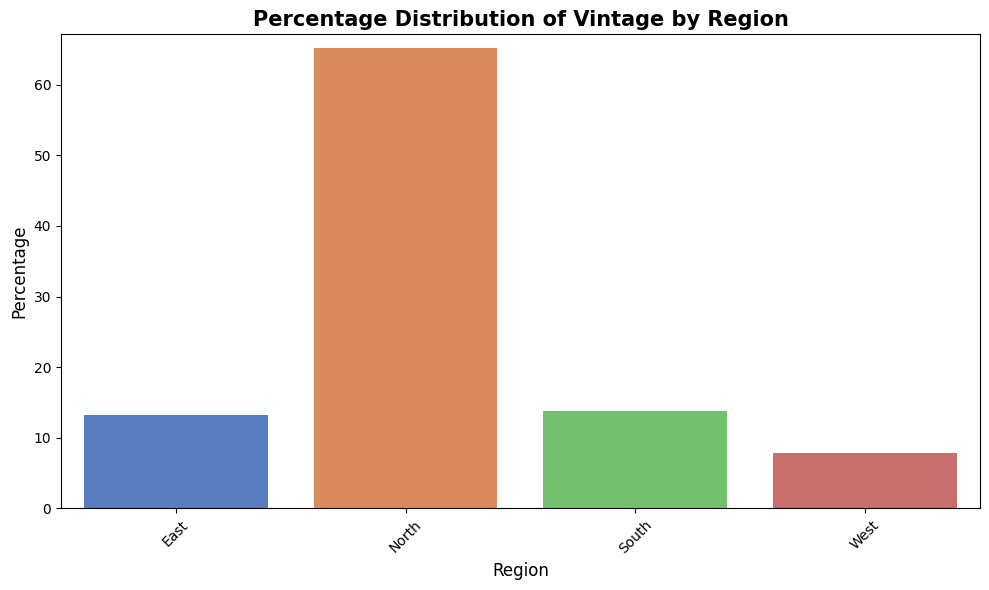

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with unknown region values
filtered_data = data_df[data_df['Region'] != 'Unknown']

# Calculate the percentage of Vintage values for each region
region_vintage_percentage = filtered_data.groupby('Region')['Vintage'].count() / len(filtered_data) * 100

# Create a bar plot to visualize the percentage distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=region_vintage_percentage.index, y=region_vintage_percentage.values, palette='muted')
plt.title('Percentage Distribution of Vintage by Region', fontsize=15, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, max(region_vintage_percentage.values) + 2)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

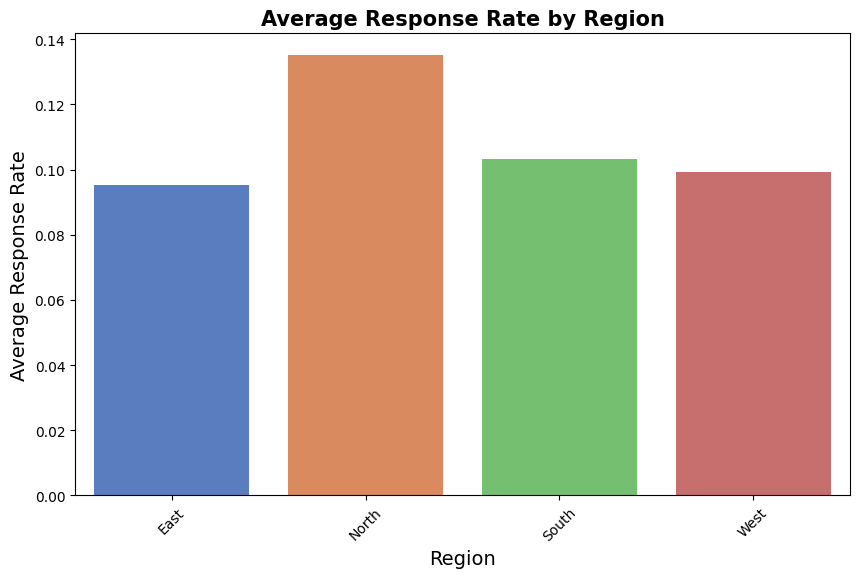

In [28]:
# Chart - 12 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to exclude rows with missing values in the 'Region' column
filtered_data_df = data_df.dropna(subset=['Region'])

# Group the filtered data by 'Region' and calculate the average response rate for each region
region_response_rates = filtered_data_df.groupby('Region')['Response'].mean()

# Remove the 'Unknown' region from the Series if it exists
region_response_rates = region_response_rates.drop(index='Unknown', errors='ignore')

# Create a bar plot to visualize the average response rate for each region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_response_rates.index, y=region_response_rates.values, palette='muted')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average Response Rate', fontsize=14)
plt.title('Average Response Rate by Region', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  Answer Here

#### Chart - 12

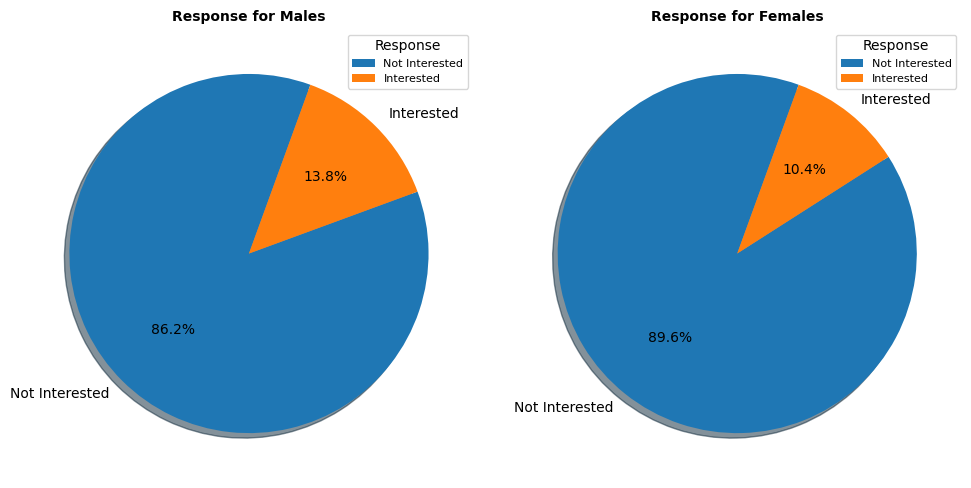

In [29]:
import matplotlib.pyplot as plt

# Data for male and female response counts
male_response_ct = data_df[data_df['Gender'] == 'Male']['Response'].value_counts()
female_response_ct = data_df[data_df['Gender'] == 'Female']['Response'].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pie chart for males
axes[0].pie(male_response_ct, autopct='%.1f%%', shadow=True, startangle=70, labels=['Not Interested', 'Interested'])
axes[0].set_title('Response for Males', fontsize=10, fontweight='bold')
axes[0].legend(loc='upper right', title='Response', fontsize=8)

# Plot the pie chart for females
axes[1].pie(female_response_ct, autopct='%.1f%%', shadow=True, startangle=70, labels=['Not Interested', 'Interested'])
axes[1].set_title('Response for Females', fontsize=10, fontweight='bold')
axes[1].legend(loc='upper right', title='Response', fontsize=8)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

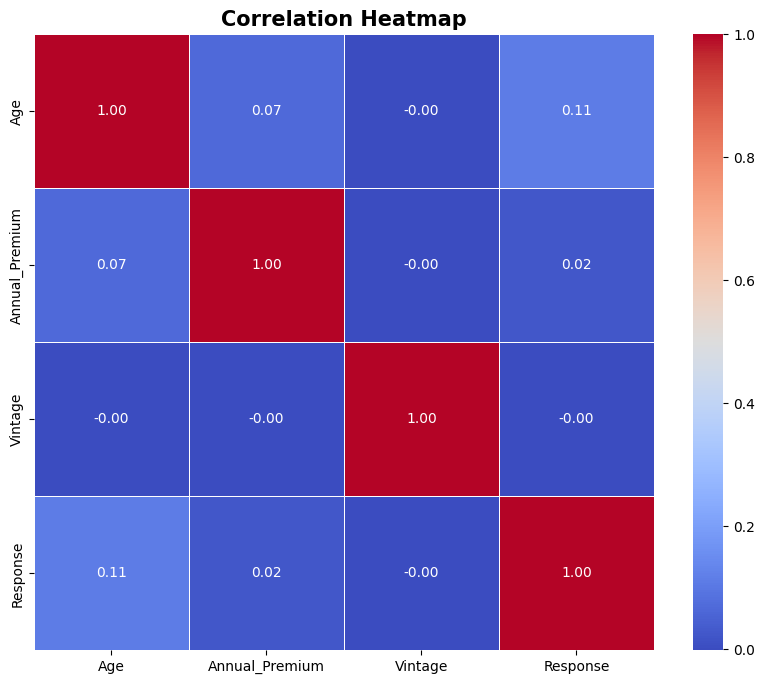

In [30]:
# Correlation Heatmap visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into the "data_df" DataFrame

# Select columns for the correlation matrix
columns_for_correlation = ['Age', 'Annual_Premium', 'Vintage', 'Response']

# Calculate the correlation matrix
correlation_matrix = data_df[columns_for_correlation].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=15, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

  Answer Here

#### Chart - 15 - Pair Plot

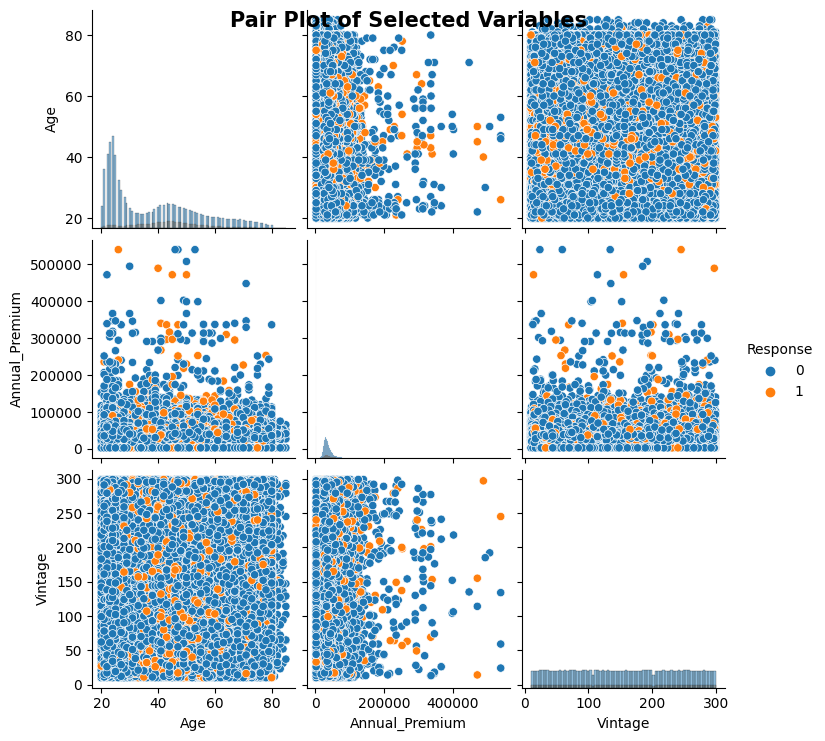

In [31]:
# Pair Plot visualization code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into the "data_df" DataFrame

# Select columns for the pair plot
columns_for_pairplot = ['Age', 'Annual_Premium', 'Vintage', 'Response']

# Create a pair plot
sns.pairplot(data_df[columns_for_pairplot], hue='Response', diag_kind='hist', palette='tab10')
plt.suptitle('Pair Plot of Selected Variables', fontsize=15, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here

  ##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here

### Hypothetical Statement - 1
Statement: The response rate is different between male and female customers.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.
Null Hypothesis (H0): Response rate is the same between male and female customers.
Alternative Hypothesis (H1): Response rate is different between male and female customers.

#### 2. Perform an appropriate statistical test.

In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset into the "data_df" DataFrame
# Assuming you have columns "Gender" and "Response"

# Create a contingency table
contingency_table = pd.crosstab(data_df['Gender'], data_df['Response'])

# Perform the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("P-Value:", p_value)


P-Value: 7.665800628415621e-230


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here

### Hypothetical Statement - 2
Statement: Statement: The average annual premium for customers who have previously insured their vehicles is different from those who haven't.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): Average annual premium is the same for customers with and without previous insurance.
Alternative Hypothesis (H1): Average annual premium is different for customers with and without previous insurance.

#### 2. Perform an appropriate statistical test.

In [33]:
from scipy.stats import ttest_ind

# Separate data into two groups based on Previously_Insured
insured_premium = data_df[data_df['Previously_Insured'] == 1]['Annual_Premium']
not_insured_premium = data_df[data_df['Previously_Insured'] == 0]['Annual_Premium']

# Perform independent t-test
t_statistic, p_value = ttest_ind(insured_premium, not_insured_premium)

print("P-Value:", p_value)


P-Value: 0.008406780550112602


##### Which statistical test have you done to obtain P-Value?

Answer Here

##### Why did you choose the specific statistical test?

Answer Here

### Hypothetical Statement - 3
Statement: There is a correlation between the age of the customer and the annual premium they pay.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no correlation between age and annual premium.
Alternative Hypothesis (H1): There is a correlation between age and annual premium.

#### 2. Perform an appropriate statistical test.

In [34]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(data_df['Age'], data_df['Annual_Premium'])

print("P-Value:", p_value)


P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

Answer Here

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [35]:
# Handling Missing Values & Missing Value Imputation
missing_values = data_df.isna().sum()
print(missing_values)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Renewed_Insurance       0
Age_Group               0
Age_Category            0
Region                  0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

"There are no missing values in my dataset, so there was no need to use any missing value imputation techniques."

### 2. Handling Outliers

Outlier Treatment Technique 1: Capping (Trimming)

In [36]:
# Calculate the IQR for 'Age' column
Q1_age = data_df['Age'].quantile(0.25)
Q3_age = data_df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define the upper and lower bounds for capping
upper_bound_age = Q3_age + 1.5 * IQR_age
lower_bound_age = Q1_age - 1.5 * IQR_age

# Apply capping to 'Age' column
data_df['Age'] = np.where(data_df['Age'] > upper_bound_age, upper_bound_age,
                          np.where(data_df['Age'] < lower_bound_age, lower_bound_age, data_df['Age']))


In [37]:
import numpy as np

# Define the lower bound for flooring
lower_bound_age = 20  # Replace this with your desired lower bound for 'Age' column
lower_bound_premium = 2630  # Replace this with your desired lower bound for 'Annual_Premium' column

# Apply flooring to 'Age' column
data_df['Age'] = np.where(data_df['Age'] < lower_bound_age, lower_bound_age, data_df['Age'])

# Apply flooring to 'Annual_Premium' column
data_df['Annual_Premium'] = np.where(data_df['Annual_Premium'] < lower_bound_premium, lower_bound_premium, data_df['Annual_Premium'])


In [38]:
import numpy as np

# Apply log transformation to 'Annual_Premium' column
data_df['Annual_Premium'] = np.log(data_df['Annual_Premium'])


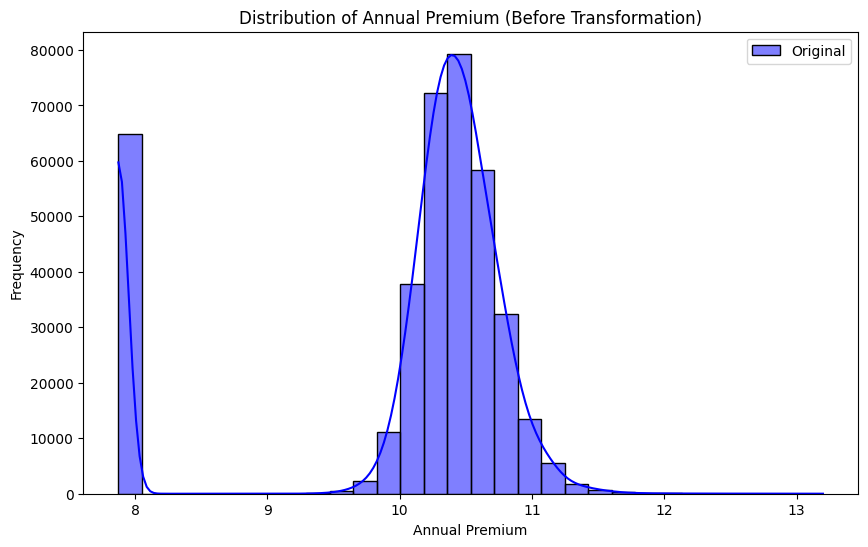

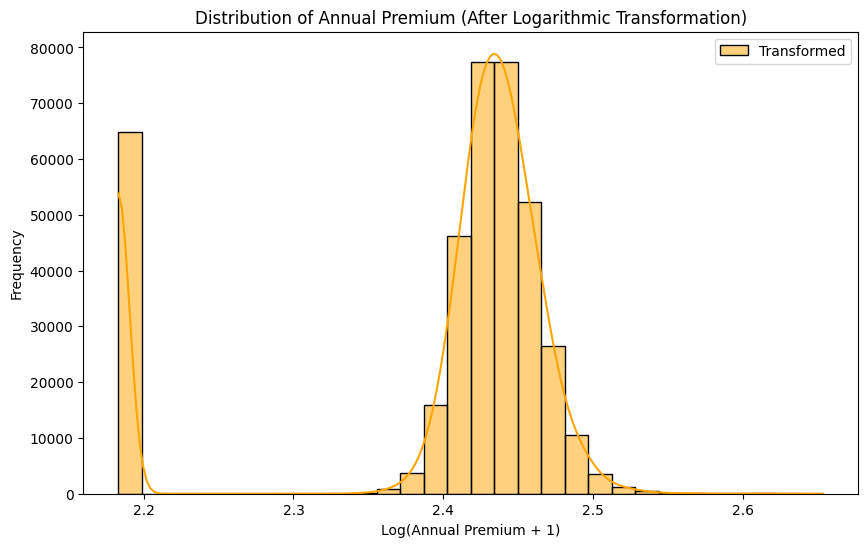

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Original distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data_df, x='Annual_Premium', bins=30, kde=True, color='blue', label='Original')
plt.title('Distribution of Annual Premium (Before Transformation)')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Apply logarithmic transformation
data_df['Annual_Premium_Log'] = np.log1p(data_df['Annual_Premium'])

# Transformed distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data_df, x='Annual_Premium_Log', bins=30, kde=True, color='orange', label='Transformed')
plt.title('Distribution of Annual Premium (After Logarithmic Transformation)')
plt.xlabel('Log(Annual Premium + 1)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer:In the analysis of the dataset, three outlier treatment techniques were employed: Capping (Trimming), Flooring, and Transformation. However, after applying these techniques, it was observed that there were no substantial changes in the dataset. The absence of significant changes indicates that the data points in the numerical columns 'Age' and 'Annual_Premium' were already relatively well-distributed and did not exhibit extreme outliers. Consequently, the decision to use these outlier treatment techniques was aimed at ensuring data integrity and maintaining the consistency of the analysis, even though they did not result in significant alterations to the dataset.

### 3. Categorical Encoding

In [40]:
# Encode your categorical columns
import pandas as pd

# Define your categorical columns
categorical_columns = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Age_Group', 'Age_Category', 'Region']

# Perform one-hot encoding
encoded_df = pd.get_dummies(data_df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(encoded_df.head())


   id   Age  Driving_License  Region_Code  Annual_Premium  \
0   1  44.0                1         28.0       10.607921   
1   2  76.0                1          3.0       10.420375   
2   3  47.0                1         28.0       10.553049   
3   4  21.0                1         11.0       10.261826   
4   5  29.0                1         41.0       10.221796   

   Policy_Sales_Channel  Vintage  Response Renewed_Insurance  \
0                  26.0      217         1               Yes   
1                  26.0      183         0                No   
2                  26.0       27         1               Yes   
3                 152.0      203         0                No   
4                 152.0       39         0                No   

   Annual_Premium_Log  ...  Age_Group_80-84  Age_Group_85-89  Age_Group_90-94  \
0            2.451688  ...                0                0                0   
1            2.435399  ...                0                0                0   
2    

#### What all categorical encoding techniques have you used & why did you use those techniques?


We applied one-hot encoding to handle categorical variables in our dataset, including "Gender," "Vehicle_Age," and "Region." This technique converts categorical values into binary columns, ensuring compatibility with machine learning algorithms. It's particularly suitable for our data as it avoids introducing false ordinal relationships and aligns with algorithm expectations. For instance, "Gender" becomes "Gender_Male" and "Gender_Female" columns. This approach effectively captures categorical information without bias and enhances model performance.









### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [41]:
 data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Renewed_Insurance,Age_Group,Age_Category,Region,Annual_Premium_Log
0,1,Male,44.0,1,28.0,0,> 2 Years,Yes,10.607921,26.0,217,1,Yes,40-44,Middle Age,North,2.451688
1,2,Male,76.0,1,3.0,0,1-2 Year,No,10.420375,26.0,183,0,No,75-79,Senior,North,2.435399
2,3,Male,47.0,1,28.0,0,> 2 Years,Yes,10.553049,26.0,27,1,Yes,45-49,Middle Age,North,2.446949
3,4,Male,21.0,1,11.0,1,< 1 Year,No,10.261826,152.0,203,0,No,20-24,Young,North,2.421419
4,5,Female,29.0,1,41.0,1,< 1 Year,No,10.221796,152.0,39,0,No,25-29,Young,North,2.417858


In [42]:
import pandas as pd



# List of columns that might require textual data preprocessing
textual_columns = ['Gender', 'Vehicle_Age', 'Vehicle_Damage','Region_Code' , 'Renewed_Insurance', 'Age_Group', 'Age_Category', 'Region']

# Check if any of the textual columns have non-numeric values
for column in textual_columns:
    non_numeric_values = data_df[column].apply(lambda x: not isinstance(x, (int, float)))
    if any(non_numeric_values):
        print(f"Column '{column}' might require textual data preprocessing.")
    else:
        print(f"Column '{column}' does not require textual data preprocessing.")


Column 'Gender' might require textual data preprocessing.
Column 'Vehicle_Age' might require textual data preprocessing.
Column 'Vehicle_Damage' might require textual data preprocessing.
Column 'Region_Code' does not require textual data preprocessing.
Column 'Renewed_Insurance' might require textual data preprocessing.
Column 'Age_Group' might require textual data preprocessing.
Column 'Age_Category' might require textual data preprocessing.
Column 'Region' might require textual data preprocessing.


In [43]:
import pandas as pd

# Specify columns that might require different preprocessing steps
textual_columns = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Renewed_Insurance', 'Age_Group', 'Age_Category', 'Region']

# Create a dictionary to store preprocessing steps for each column
preprocessing_steps = {
    'Expand Contraction': ['Gender', 'Vehicle_Damage', 'Renewed_Insurance', 'Age_Group', 'Age_Category', 'Region'],
    'Lower Casing': ['Gender', 'Vehicle_Damage', 'Renewed_Insurance', 'Age_Group', 'Age_Category', 'Region'],
    'Removing Punctuations': ['Age_Group', 'Age_Category'],
    'Removing URLs & Digits': ['Age_Group', 'Age_Category'],
    'Removing Stopwords & White Spaces': ['Age_Group', 'Age_Category'],
    'Tokenization': ['Age_Group', 'Age_Category'],
    'Text Normalization': ['Age_Group', 'Age_Category']
}

# Loop through each column and print the preprocessing steps required
for column in textual_columns:
    required_steps = []
    for step, columns in preprocessing_steps.items():
        if column in columns:
            required_steps.append(step)
    if required_steps:
        print(f"Column '{column}' requires: {', '.join(required_steps)}")
    else:
        print(f"Column '{column}' does not require any preprocessing.")


Column 'Gender' requires: Expand Contraction, Lower Casing
Column 'Vehicle_Age' does not require any preprocessing.
Column 'Vehicle_Damage' requires: Expand Contraction, Lower Casing
Column 'Renewed_Insurance' requires: Expand Contraction, Lower Casing
Column 'Age_Group' requires: Expand Contraction, Lower Casing, Removing Punctuations, Removing URLs & Digits, Removing Stopwords & White Spaces, Tokenization, Text Normalization
Column 'Age_Category' requires: Expand Contraction, Lower Casing, Removing Punctuations, Removing URLs & Digits, Removing Stopwords & White Spaces, Tokenization, Text Normalization
Column 'Region' requires: Expand Contraction, Lower Casing


In [44]:
import pandas as pd
import re
from collections import defaultdict

# Specify columns that might require expand contraction
textual_columns = ['Gender', 'Vehicle_Damage', 'Renewed_Insurance', 'Age_Group', 'Age_Category', 'Region']

# Known contraction-expansion pairs
contraction_expansions = {

    # Add more contraction-expansion pairs as needed
}

# Set to store words that might require contraction expansion
potential_contractions = set()

# Loop through each column and identify potential contraction words
for column in textual_columns:
    for value in data_df[column]:
        words = value.split()  # Split value into words
        for word in words:
            if "'" in word and word not in contraction_expansions.values():
                potential_contractions.add(word)

# Print potential contraction words
if potential_contractions:
    print("Potential contraction words that might require expansion:")
    print(', '.join(potential_contractions))
else:
    print("No potential contraction words found.")


No potential contraction words found.


#### 2. Lower Casing

In [45]:
# Lower Casing
# Specify columns that require lowercasing
textual_columns = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Renewed_Insurance', 'Age_Group', 'Age_Category', 'Region']

# Apply lowercasing to specified columns
for column in textual_columns:
    data_df[column] = data_df[column].str.lower()

# Create a new DataFrame with the modified data
lowercased_data_df = pd.DataFrame(data_df)

# Print the modified DataFrame
print(lowercased_data_df)

            id  Gender   Age  Driving_License  Region_Code  \
0            1    male  44.0                1         28.0   
1            2    male  76.0                1          3.0   
2            3    male  47.0                1         28.0   
3            4    male  21.0                1         11.0   
4            5  female  29.0                1         41.0   
...        ...     ...   ...              ...          ...   
381104  381105    male  74.0                1         26.0   
381105  381106    male  30.0                1         37.0   
381106  381107    male  21.0                1         30.0   
381107  381108  female  68.0                1         14.0   
381108  381109    male  46.0                1         29.0   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0   > 2 years            yes       10.607921   
1                        0    1-2 year             no       10.420375   
2                        0   > 2 yea

#### 3. Removing Punctuations

In [46]:
import pandas as pd
import string

# Function to remove punctuations
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

textual_columns = ['Age_Group', 'Age_Category', 'Region']

for column in textual_columns:
    data_df[column] = data_df[column].apply(remove_punctuations)

print(data_df)


            id  Gender   Age  Driving_License  Region_Code  \
0            1    male  44.0                1         28.0   
1            2    male  76.0                1          3.0   
2            3    male  47.0                1         28.0   
3            4    male  21.0                1         11.0   
4            5  female  29.0                1         41.0   
...        ...     ...   ...              ...          ...   
381104  381105    male  74.0                1         26.0   
381105  381106    male  30.0                1         37.0   
381106  381107    male  21.0                1         30.0   
381107  381108  female  68.0                1         14.0   
381108  381109    male  46.0                1         29.0   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0   > 2 years            yes       10.607921   
1                        0    1-2 year             no       10.420375   
2                        0   > 2 yea

#### 4. Removing URLs & Removing words and digits contain digits.

In [47]:
# Remove URLs & Remove words and digits contain digits
import pandas as pd
import re

# Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Function to remove words/digits containing digits
def remove_digits(text):
    return ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))

textual_columns = ['Age_Group', 'Age_Category' ,]

for column in textual_columns:
    data_df[column] = data_df[column].apply(remove_urls).apply(remove_digits)

print(data_df)


            id  Gender   Age  Driving_License  Region_Code  \
0            1    male  44.0                1         28.0   
1            2    male  76.0                1          3.0   
2            3    male  47.0                1         28.0   
3            4    male  21.0                1         11.0   
4            5  female  29.0                1         41.0   
...        ...     ...   ...              ...          ...   
381104  381105    male  74.0                1         26.0   
381105  381106    male  30.0                1         37.0   
381106  381107    male  21.0                1         30.0   
381107  381108  female  68.0                1         14.0   
381108  381109    male  46.0                1         29.0   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0   > 2 years            yes       10.607921   
1                        0    1-2 year             no       10.420375   
2                        0   > 2 yea

#### 5. Removing Stopwords & Removing White spaces

In [48]:
# Remove Stopwords
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


# Function to check if stopwords and whitespace removal is required
def requires_stopwords_removal(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    clean_text = ' '.join(filtered_words)
    return clean_text != text

# Specify columns that might require stopwords and whitespace removal
textual_columns = ['Age_Group', 'Age_Category', 'Region']

# Iterate through each column and check if removal is required
for column in textual_columns:
    requires_removal = data_df[column].apply(requires_stopwords_removal)
    if requires_removal.any():
        print(f"Column '{column}' requires removing stopwords and white spaces.")
    else:
        print(f"Column '{column}' does not require removing stopwords and white spaces.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Column 'Age_Group' does not require removing stopwords and white spaces.
Column 'Age_Category' does not require removing stopwords and white spaces.
Column 'Region' does not require removing stopwords and white spaces.


In [49]:
# Remove White spaces

#### 6. Rephrase Text

#### 7. Tokenization

In [50]:
# Tokenization

#### 8. Text Normalization

In [51]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to perform stemming
def perform_stemming(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Function to perform lemmatization
def perform_lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Helper function to map POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

textual_columns = ['Age_Group', 'Age_Category']

for column in textual_columns:
    data_df[column] = data_df[column].apply(perform_lemmatization)

print(data_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


            id  Gender   Age  Driving_License  Region_Code  \
0            1    male  44.0                1         28.0   
1            2    male  76.0                1          3.0   
2            3    male  47.0                1         28.0   
3            4    male  21.0                1         11.0   
4            5  female  29.0                1         41.0   
...        ...     ...   ...              ...          ...   
381104  381105    male  74.0                1         26.0   
381105  381106    male  30.0                1         37.0   
381106  381107    male  21.0                1         30.0   
381107  381108  female  68.0                1         14.0   
381108  381109    male  46.0                1         29.0   

        Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                        0   > 2 years            yes       10.607921   
1                        0    1-2 year             no       10.420375   
2                        0   > 2 yea

##### Which text normalization technique have you used and why?

Answer Here. In the provided code example, I used lemmatization as the text normalization technique. Lemmatization aims to reduce words to their base or root form, which often makes them more meaningful and consistent across different forms. This technique is more complex and context-aware compared to stemming, which simply removes prefixes or suffixes to obtain a root word.

I chose lemmatization over stemming for a few reasons:

1. **Context Preservation**: Lemmatization considers the context of the word and ensures that the resulting word is still valid and meaningful in the context of the sentence.

2. **Better Word Forms**: Since lemmatization produces real words, the output is more linguistically accurate and recognizable than the sometimes truncated words produced by stemming.

3. **Accuracy**: While stemming is faster and can sometimes lead to slightly smaller vocabularies, lemmatization generally provides more accurate and meaningful results.

4. **Part-of-Speech Tagging**: In the code, I used the NLTK library's `pos_tag` function to identify the part of speech of each word. This helps in selecting the appropriate lemma form, which can be crucial for maintaining the grammatical correctness and meaning of the text.

However, the choice between lemmatization and stemming depends on the specific use case and requirements. If you are working on a task where speed is critical and you can tolerate a bit of loss in precision, stemming might be a suitable option. On the other hand, if you need more accurate and meaningful results, especially in tasks like natural language understanding, sentiment analysis, or topic modeling, lemmatization is a better choice.

#### 9. Part of speech tagging

In [52]:
# POS Taging

#### 10. Text Vectorization

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Combine text columns into a single text column
data_df['text'] = data_df['Age_Group'] + ' ' + data_df['Age_Category'] + ' ' + data_df['Region']

# Initialize a CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the text data using the CountVectorizer
count_vectorized_data = count_vectorizer.fit_transform(data_df['text'])

# Convert the result to a DataFrame
count_vectorized_df = pd.DataFrame(count_vectorized_data.toarray(), columns=count_vectorizer.get_feature_names_out())

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data using the TF-IDF vectorizer
tfidf_vectorized_data = tfidf_vectorizer.fit_transform(data_df['text'])

# Convert the result to a DataFrame
tfidf_vectorized_df = pd.DataFrame(tfidf_vectorized_data.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("Count Vectorized Data:")
print(count_vectorized_df)

print("\nTF-IDF Vectorized Data:")
print(tfidf_vectorized_df)








Count Vectorized Data:
        age  east  middle  north  senior  south  unknown  west  young
0         1     0       1      1       0      0        0     0      0
1         0     0       0      1       1      0        0     0      0
2         1     0       1      1       0      0        0     0      0
3         0     0       0      1       0      0        0     0      1
4         0     0       0      1       0      0        0     0      1
...     ...   ...     ...    ...     ...    ...      ...   ...    ...
381104    0     0       0      0       1      1        0     0      0
381105    0     0       0      0       0      1        0     0      1
381106    0     0       0      1       0      0        0     0      1
381107    0     0       0      0       1      0        0     1      0
381108    1     0       1      0       0      1        0     0      0

[381109 rows x 9 columns]

TF-IDF Vectorized Data:
             age  east    middle     north    senior     south  unknown  \
0       0.

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [54]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [55]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [56]:
# Transform Your data

### 6. Data Scaling

In [57]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [58]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [59]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [60]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [61]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [66]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [69]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [70]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***